<a href="https://colab.research.google.com/github/sriram7040/imageclassification/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download("motorbikes",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/motorbikes


[!!]Indexing page: 1

[%] Indexed 31 Images on Page 1.


[%] Downloading Image #1 from http://img683.imageshack.us/img683/1755/bmwr75519692.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.tigitmotorbikes.com/wp-content/uploads/2016/05/Yamaha-NVX.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.motorbikesindia.com/wp-content/uploads/2016/08/ten-beautiful-motorbikes-india.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://img98.imageshack.us/img98/2167/bmwr9061974.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/09/9f/a5/099fa53ea0d5e6bfcc1976fab4669501.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://s-media-cache-ak0.pinimg.com/originals/48/ff/68/48ff68b5f7a7855608ad9e4fc55da685.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/f9/f2/f2/f9f2f2d42c087751f03cb3d99b70c004.gif
[%] File Downlo

In [ ]:
from bing_image_downloader import downloader
downloader.download("train",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/train


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/1e/c5/a0/1ec5a03b40dcf61a300f08731f45b190.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://true-romania.tours/wp-content/uploads/2017/05/steam-train.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://files.sysers.com/cp/upload/ccfj_eventrentalsystems/editor/images/trackless%20train%20rentals%20in%20clovis,%20ca.png
[%] File Downloaded !

[%] Downloading Image #4 from https://lh3.googleusercontent.com/eZEYQjtvh4IZYXHsnJGaKFjY7D3G4Ti1V1Ae_e-vlNFrg0x4g6duxSmpiCpZR7vndLG8sbIaWu2UxNbWipIEt0dT=s1000
[%] File Downloaded !

[%] Downloading Image #5 from http://www.highlandernews.org/wp-content/uploads/2015/11/ops.train_.calhigh.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/18/ae/1c/18ae1c39094ac55bcf3fee5c9a0cf469.jpg
[%] File Downloaded !

[%] Downloading Im

In [ ]:
from bing_image_downloader import downloader
downloader.download("truck",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/truck


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://149348877.v2.pressablecdn.com/wp-content/uploads/2018/11/international-cv-truck-for-sale-nashville-tn01-1080x675.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.tfltruck.com/wp-content/uploads/2018/11/rivian-r1t-electric-truck-crew-cab.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://100hotcars.info/wp-content/uploads/2019/11/fiats-new-toro-sports-pickup-truck-shows-its-true-face-in-official-photo.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://st.hotrod.com/uploads/sites/21/2015/02/1949-chevrolet-3100-rear-driver-side.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://topworldauto.com/photos/Mack/6a/a5/24668_mack-rd600-true-truck-value-true-truck-value.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://forddaily.net/attachments/airborne-1969-f100-tube-chassis-me

In [ ]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]#outputs
images=[]#data given(input)
flatten_data=[]

datadir = "/content/images"

categories = ["motorbikes",'train','truck']

for category in categories:
  class_num =categories.index(category) #label encoding the values of list categories
  path = os.path.join(datadir,category) #iterate through the images
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    img_resized =resize(img_arr,(150,150,3)) #normalize the values
    flatten_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flatten_data=np.array(flatten_data)
target = np.array(target)
images = np.array(images)


In [ ]:
#traininng and testing using svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flatten_data,target,test_size=0.3,random_state=109)


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
paramgrid = [ {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              ] 
svc = svm.SVC(probability=True) 
clf = GridSearchCV(svc,paramgrid) 
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
#saveing the trained model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

enter your urlhttps://images.news18.com/ibnlive/uploads/2021/05/1620622932_train1.jpg?im=FitAndFill,width=1200,height=1200
(1200, 1200, 3)
predicted output: train


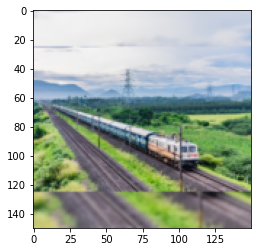

In [ ]:
#testing a new image
flatten_data=[]
url=input("enter your url")
img = imread(url)
img_resized = resize(img,(150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
print(f'predicted output: {y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile app.py
#Deployment using Streamit

import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option("deprecation.showfileUploaderEncoding",False)
st.title("Image Classifier using Machine Learning")
st.text("upload an Image")
model = pickle.load(open('img_model.p','rb'))
uploaded_file = st.file_uploader("Choose an Image...",type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button("PREDICT"):
    categories = ["motorbikes",'train','truck']
    st.write("Result...")
    flatten_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flatten_data.append(img_resized.flatten())
    flatten_data = np.array(flatten_data)
    y_out = model.predict(flatten_data)
    y_out = categories[y_out[0]]
    st.write(f'predicted output: {y_out}')

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://869e-104-154-46-162.ngrok.io'